Primero importamos las librerías:

In [8]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# Para manipulación de los datos
import pandas as pd
import numpy as np
import io
  
# Para gráficos
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# Para ignorar amenazas
import warnings
warnings.filterwarnings("ignore")

Cargamos el archivo que usaremos en el análisis:

In [6]:
from google.colab import files 
uploaded = files.upload()

Saving SCCO.xlsx to SCCO.xlsx


Leemos el archivo que hemos subido para extraer los datos y los mostramos en pantalla:

In [9]:
df = pd.read_excel(io.BytesIO(uploaded['SCCO.xlsx'])) 
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0    2021-12-02  57.500000  58.709999  57.400002  58.689999  55.093365   
1    2021-12-03  59.000000  59.250000  57.400002  58.180000  54.614624   
2    2021-12-06  59.110001  59.360001  57.599998  58.770000  55.168465   
3    2021-12-07  60.099998  60.930000  59.630001  59.820000  56.154121   
4    2021-12-08  59.759998  60.869999  59.599998  60.310001  56.614090   
..          ...        ...        ...        ...        ...        ...   
248  2022-11-28  58.470001  58.709999  57.340000  57.630001  57.630001   
249  2022-11-29  59.160000  59.709999  58.509998  59.330002  59.330002   
250  2022-11-30  59.950001  61.240002  59.119999  61.020000  61.020000   
251  2022-12-01  60.750000  61.840000  60.310001  61.459999  61.459999   
252  2022-12-02  60.459999  62.200001  60.119999  61.970001  61.970001   

      Volume  
0    1116100  
1     805400  
2     633700  
3     881800  
4     533600  
..       ...  
248  1

Los datos deben procesarse antes de su uso, de modo que la columna Date tomará la función de índice para hacerlo. Así que primero cambiamos la columna Date como índice...:

In [10]:
df.index = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-12-02,2021-12-02,57.500000,58.709999,57.400002,58.689999,55.093365,1116100
2021-12-03,2021-12-03,59.000000,59.250000,57.400002,58.180000,54.614624,805400
2021-12-06,2021-12-06,59.110001,59.360001,57.599998,58.770000,55.168465,633700
2021-12-07,2021-12-07,60.099998,60.930000,59.630001,59.820000,56.154121,881800
2021-12-08,2021-12-08,59.759998,60.869999,59.599998,60.310001,56.614090,533600
...,...,...,...,...,...,...,...
2022-11-28,2022-11-28,58.470001,58.709999,57.340000,57.630001,57.630001,1034100
2022-11-29,2022-11-29,59.160000,59.709999,58.509998,59.330002,59.330002,1203600
2022-11-30,2022-11-30,59.950001,61.240002,59.119999,61.020000,61.020000,2218300


...y luego borramos la columna Date original:

In [11]:
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-02,57.500000,58.709999,57.400002,58.689999,55.093365,1116100
2021-12-03,59.000000,59.250000,57.400002,58.180000,54.614624,805400
2021-12-06,59.110001,59.360001,57.599998,58.770000,55.168465,633700
2021-12-07,60.099998,60.930000,59.630001,59.820000,56.154121,881800
2021-12-08,59.759998,60.869999,59.599998,60.310001,56.614090,533600
...,...,...,...,...,...,...
2022-11-28,58.470001,58.709999,57.340000,57.630001,57.630001,1034100
2022-11-29,59.160000,59.709999,58.509998,59.330002,59.330002,1203600
2022-11-30,59.950001,61.240002,59.119999,61.020000,61.020000,2218300


Las variables explicativas o independientes se utilizan para predecir la variable de respuesta de valor. La X es un conjunto de datos que contiene las variables que se utilizan para la predicción. La **X** consiste en variables como 'Open – Close' y 'High – Low'. Estos pueden entenderse como indicadores en función de los cuales el algoritmo predecirá la tendencia.

Primero creamos las variables predictivas:

In [15]:
df['Open - Close'] = df.Open - df.Close
df['High - Low'] = df.High - df.Low

Luego las colocamos en la variable X:

In [16]:
X = df[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2021-12-02,-1.189999,1.309997
2021-12-03,0.820000,1.849998
2021-12-06,0.340001,1.760003
2021-12-07,0.279998,1.299999
2021-12-08,-0.550003,1.270001


La variable objetivo es el resultado que el modelo de aprendizaje automático predecirá en función de las variables explicativas. **Y** es un conjunto de datos objetivo que almacena la señal comercial correcta que el algoritmo de aprendizaje automático intentará predecir. Si el precio de mañana es mayor que el precio de hoy, entonces compraremos la acción en particular, de lo contrario no tendremos ninguna posición en el. Almacenaremos +1 para una señal de compra y 0 para una posición sin en y. Usaremos ***where()function*** de NumPy para hacer esto.

In [17]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

Dividiremos los datos en conjuntos de datos de entrenamiento y prueba. Esto se hace para que podamos evaluar la efectividad del modelo en el conjunto de datos de prueba.

In [18]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Data set Entrenamiento
X_train = X[:split]
y_train = y[:split]
  
# Data set Prueba
X_test = X[split:]
y_test = y[split:]

Usaremos la función SVC() de la biblioteca sklearn.svm.SVC para crear nuestro modelo clasificador utilizando el método fit() en el conjunto de datos de entrenamiento.

In [19]:
cls = SVC().fit(X_train, y_train)

Vamos a predecir la señal (comprar o vender) usando la función ***cls.predict()***:

In [28]:
df['Predicted_Signal'] = cls.predict(X)

Calculamos devoluciones diarias:

In [29]:
df['Return'] = df.Close.pct_change()

Ahora calculamos los retornos de estrategia:

In [30]:
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

Y por último los rendimientos acumulados:

In [31]:
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Open - Close,High - Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,,,
2021-12-02,57.500000,58.709999,57.400002,58.689999,55.093365,1116100,-1.189999,1.309997,-1.189999,1.309997,0,NaN,NaN,NaN
2021-12-03,59.000000,59.250000,57.400002,58.180000,54.614624,805400,0.820000,1.849998,0.820000,1.849998,0,-0.008690,-0.000000,-0.008690
2021-12-06,59.110001,59.360001,57.599998,58.770000,55.168465,633700,0.340001,1.760003,0.340001,1.760003,0,0.010141,0.000000,0.001451
2021-12-07,60.099998,60.930000,59.630001,59.820000,56.154121,881800,0.279998,1.299999,0.279998,1.299999,0,0.017866,0.000000,0.019317
2021-12-08,59.759998,60.869999,59.599998,60.310001,56.614090,533600,-0.550003,1.270001,-0.550003,1.270001,0,0.008191,0.000000,0.027509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,58.470001,58.709999,57.340000,57.630001,57.630001,1034100,0.840000,1.369999,0.840000,1.369999,0,-0.019731,-0.000000,0.058567
2022-11-29,59.160000,59.709999,58.509998,59.330002,59.330002,1203600,-0.170002,1.200001,-0.170002,1.200001,0,0.029499,0.000000,0.088066
2022-11-30,59.950001,61.240002,59.119999,61.020000,61.020000,2218300,-1.069999,2.120003,-1.069999,2.120003,1,0.028485,0.000000,0.116551


In [32]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Open - Close,High - Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,,
2021-12-02,57.500000,58.709999,57.400002,58.689999,55.093365,1116100,-1.189999,1.309997,-1.189999,1.309997,0,NaN,NaN,NaN,NaN
2021-12-03,59.000000,59.250000,57.400002,58.180000,54.614624,805400,0.820000,1.849998,0.820000,1.849998,0,-0.008690,-0.000000,-0.008690,0.000000
2021-12-06,59.110001,59.360001,57.599998,58.770000,55.168465,633700,0.340001,1.760003,0.340001,1.760003,0,0.010141,0.000000,0.001451,0.000000
2021-12-07,60.099998,60.930000,59.630001,59.820000,56.154121,881800,0.279998,1.299999,0.279998,1.299999,0,0.017866,0.000000,0.019317,0.000000
2021-12-08,59.759998,60.869999,59.599998,60.310001,56.614090,533600,-0.550003,1.270001,-0.550003,1.270001,0,0.008191,0.000000,0.027509,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,58.470001,58.709999,57.340000,57.630001,57.630001,1034100,0.840000,1.369999,0.840000,1.369999,0,-0.019731,-0.000000,0.058567,0.118853
2022-11-29,59.160000,59.709999,58.509998,59.330002,59.330002,1203600,-0.170002,1.200001,-0.170002,1.200001,0,0.029499,0.000000,0.088066,0.118853
2022-11-30,59.950001,61.240002,59.119999,61.020000,61.020000,2218300,-1.069999,2.120003,-1.069999,2.120003,1,0.028485,0.000000,0.116551,0.118853


Con la información obtenida, hacemos una comparación de devoluciones de estrategia de trama vs. las devoluciones originales:

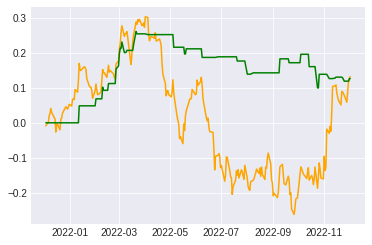

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='orange')
plt.plot(df['Cum_Strategy'],color='green')